In [52]:
import pandas as pd
from matplotlib import pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In [20]:
data = pd.read_csv('data/technical/cleaned_data.csv')
data

,department_name,program_category,category_description,program_name,program_description,measure_type,deliverable,measure_unit,measure_target,estimate_or_actual,year
0,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,nm,nm,2017-18
1,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,nm,nm,2016-17
2,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,nm,nm,2015-16
3,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,nm,nm,2014-15
4,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,nm,nm,2013-14
5,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,nm,nm,2012-13
6,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,nm,nm,2011-12
7,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,nm,nm,2010-11
8,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,nm,nm,2009-10
9,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,nm,nm,2008-09


In [9]:
data['deliverable'].value_counts()

Total output cost                                                                                                                                                                             1034
Complaints or notifications about public sector corrupt conduct (excluding police personnel conduct and police personnel corrupt conduct) assessed by IBAC within 45 days                       22
Service delivery hours in community health care                                                                                                                                                 22
Economic projects being delivered in accordance with contracted timelines (within 5 per cent variation)                                                                                         22
Number of economic projects in delivery                                                                                                                                                         22
Victoria represented in m

In [25]:
# Convert nm values to null
# Remove rows that have dont have at least one null in values columns
value_cols = ['measure_target', 'estimate_or_actual']
df = data.copy()
for value_col in value_cols:
    df.loc[df[value_col] == 'nm', value] = pd.np.nan  
df.dropna(subset = value_cols, inplace = True)
data1 = df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3804 entries, 45 to 11966
Data columns (total 11 columns):
department_name         3804 non-null object
program_category        3804 non-null object
category_description    3202 non-null object
program_name            3804 non-null object
program_description     3795 non-null object
measure_type            3804 non-null object
deliverable             3804 non-null object
measure_unit            3804 non-null object
measure_target          3804 non-null object
estimate_or_actual      3804 non-null object
year                    3804 non-null object
dtypes: object(11)
memory usage: 356.6+ KB


In [38]:
# Remove estimate_or_actual values that are not numbers
df = data1.copy()
for value_col in value_cols:
    df[value_col] = df[value_col].astype(float, errors = 'ignore')
    df['{}_dtype'.format(value_col)] = df[value_col].map(lambda x: str(type(x)))
data2 = df
df

,department_name,program_category,category_description,program_name,program_description,measure_type,deliverable,measure_unit,measure_target,estimate_or_actual,year,measure_target_dtype,estimate_or_actual_dtype
45,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded emergency separations – all hospitals,number (000),571.0,584.0,2016-17,<class 'float'>,<class 'float'>
46,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded emergency separations – all hospitals,number (000),529.0,546.0,2015-16,<class 'float'>,<class 'float'>
47,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded emergency separations – all hospitals,number (000),477.0,488.0,2014-15,<class 'float'>,<class 'float'>
48,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded emergency separations – all hospitals,number (000),436.0,439.0,2013-14,<class 'float'>,<class 'float'>
50,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded emergency separations – all hospitals,number (000),533.0,534.0,2011-12,<class 'float'>,<class 'float'>
51,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded emergency separations – all hospitals,number (000),490.0,516.0,2010-11,<class 'float'>,<class 'float'>
52,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded emergency separations – all hospitals,number (000),481.0,496.0,2009-10,<class 'float'>,<class 'float'>
53,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded emergency separations – all hospitals,number (000),483.0,500.0,2008-09,<class 'float'>,<class 'float'>
63,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded separations – all hospitals except...,number (000),950.0,985.0,2009-10,<class 'float'>,<class 'float'>
64,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded separations – all hospitals except...,number (000),938.0,948.0,2008-09,<class 'float'>,<class 'float'>


In [39]:
# Show the data types for value columns
for value_col in value_cols:
    print(df['{}_dtype'.format(value_col)].value_counts())

<class 'float'>    3804
Name: measure_target_dtype, dtype: int64
<class 'float'>    3804
Name: estimate_or_actual_dtype, dtype: int64


In [41]:
# Show lengths of all years
df = data2
df['year'].map(lambda x: len(x)).value_counts()

7    3783
9      17
8       4
Name: year, dtype: int64

In [55]:
# Fix year (brute force - based on string of length 7)
# Take the later-year (ie take 2018 from 2017-2018)
df = data2.copy()
df = df[df['year'].map(lambda x: len(x)) == 7] # Keep only valid years
df['year'] = df['year'].map(lambda x: x[:2] + x[-2:])
df['year'] = pd.to_datetime(df['year'])
df = df.set_index('year')
data3 = df
df

,department_name,program_category,category_description,program_name,program_description,measure_type,deliverable,measure_unit,measure_target,estimate_or_actual,measure_target_dtype,estimate_or_actual_dtype
year,,,,,,,,,,,,
2017-01-01,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded emergency separations – all hospitals,number (000),571.0,584.0,<class 'float'>,<class 'float'>
2016-01-01,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded emergency separations – all hospitals,number (000),529.0,546.0,<class 'float'>,<class 'float'>
2015-01-01,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded emergency separations – all hospitals,number (000),477.0,488.0,<class 'float'>,<class 'float'>
2014-01-01,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded emergency separations – all hospitals,number (000),436.0,439.0,<class 'float'>,<class 'float'>
2012-01-01,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded emergency separations – all hospitals,number (000),533.0,534.0,<class 'float'>,<class 'float'>
2011-01-01,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded emergency separations – all hospitals,number (000),490.0,516.0,<class 'float'>,<class 'float'>
2010-01-01,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded emergency separations – all hospitals,number (000),481.0,496.0,<class 'float'>,<class 'float'>
2009-01-01,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded emergency separations – all hospitals,number (000),483.0,500.0,<class 'float'>,<class 'float'>
2010-01-01,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded separations – all hospitals except...,number (000),950.0,985.0,<class 'float'>,<class 'float'>


In [56]:
df = data3.copy()
df = df[df['deliverable'] == 'Audited cases statewide meeting clinical practice standards' ]
deliverable = df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2017-01-01 to 2009-01-01
Data columns (total 12 columns):
department_name             18 non-null object
program_category            18 non-null object
category_description        18 non-null object
program_name                18 non-null object
program_description         18 non-null object
measure_type                18 non-null object
deliverable                 18 non-null object
measure_unit                18 non-null object
measure_target              18 non-null float64
estimate_or_actual          18 non-null float64
measure_target_dtype        18 non-null object
estimate_or_actual_dtype    18 non-null object
dtypes: float64(2), object(10)
memory usage: 1.8+ KB


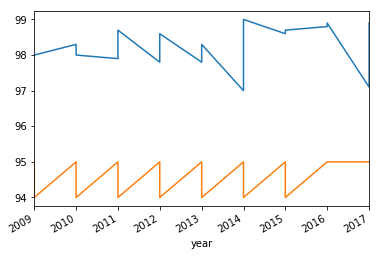

In [58]:
deliverable['measure_target'].plot()
deliverable['estimate_or_actual'].plot()

In [41]:
# Given the abundance of data points for 'measure_unit' and 'per cent' and 'number, 
# Create visualisations on only these values.
measure_units = ['per cent', 'number']
df = data2.copy()
df = df[df['measure_unit'].isin(measure_units)]
data3 = df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4286 entries, 10 to 10647
Data columns (total 11 columns):
department_name         4286 non-null object
program_category        4286 non-null object
category_description    3893 non-null object
program_name            4286 non-null object
program_description     4271 non-null object
measure_type            4286 non-null object
deliverable             4286 non-null object
measure_unit            4286 non-null object
measure_target          3282 non-null object
estimate_or_actual      3282 non-null object
year                    4286 non-null object
dtypes: object(11)
memory usage: 401.8+ KB


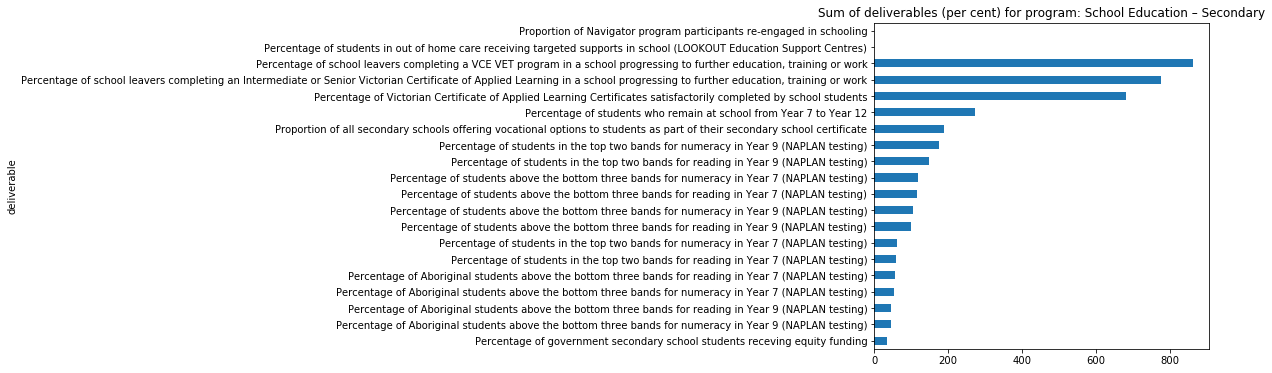

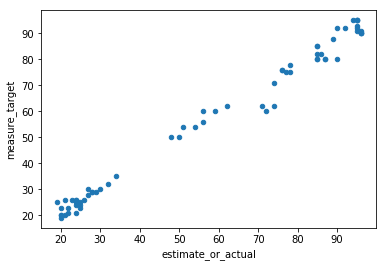

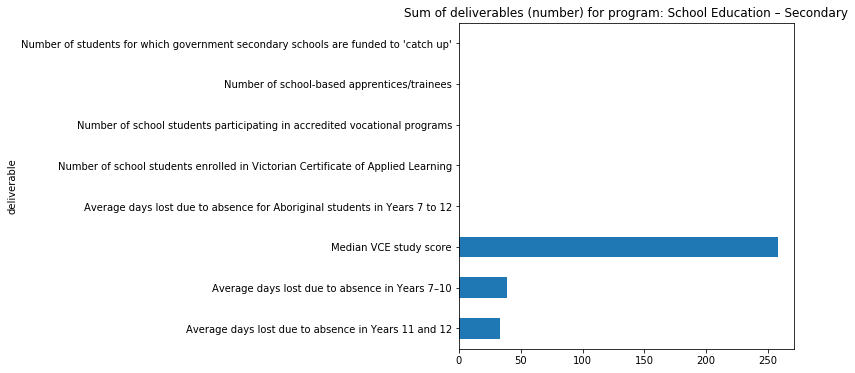

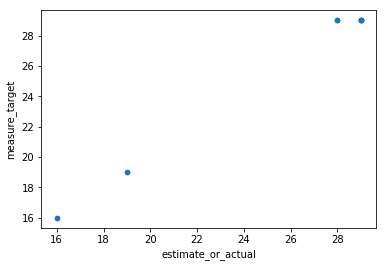

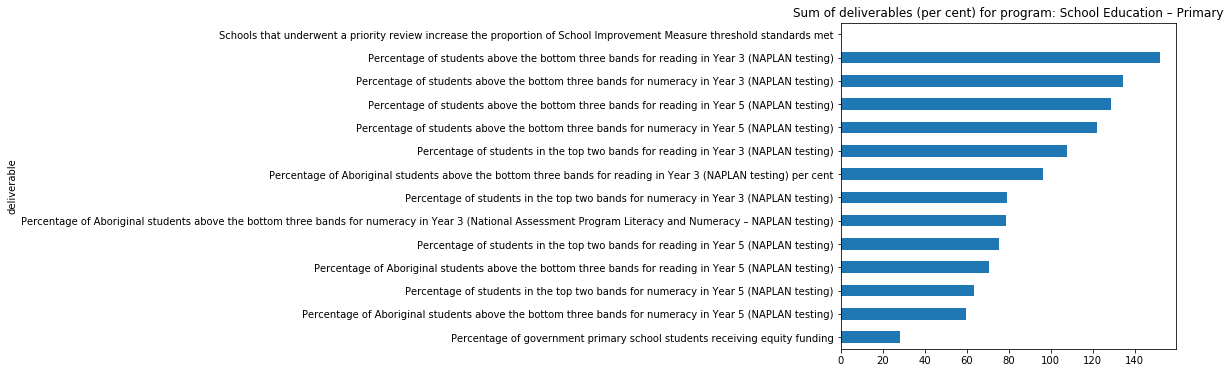

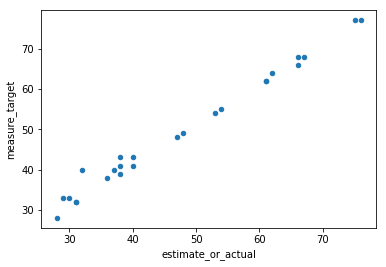

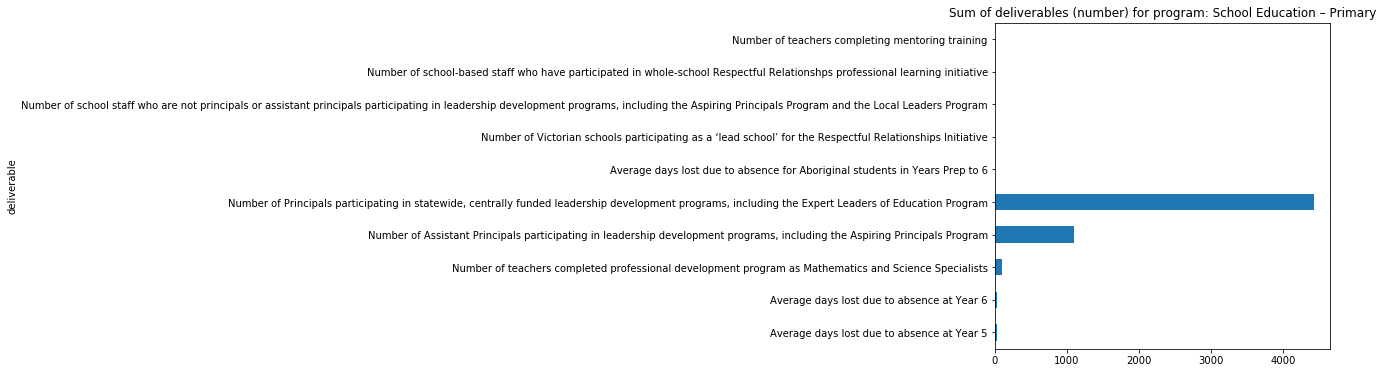

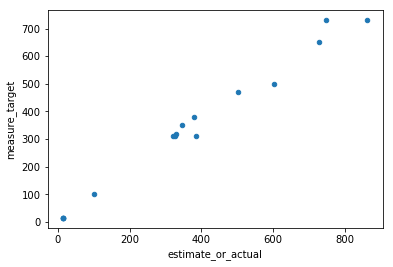

In [65]:
# Run some visualisations on programs of interest
programs_of_interest = ['School Education – Secondary', 'School Education – Primary']
df = data3.copy()
for program in programs_of_interest:
    for measure_unit in measure_units:
        tmp = df[(df['program_name'] == program) & (df['measure_unit'] == measure_unit)]
        
        # Bar charts
        tmp[['deliverable', 'estimate_or_actual']].groupby(['deliverable']).sum().sort_values(by = ['estimate_or_actual']
            ).plot(kind = 'barh', title = 'Sum of deliverables ({}) for program: {}'.format(measure_unit, program), legend = False, figsize = (6,6))
        
        # Scatter plots
        tmp[['estimate_or_actual', 'measure_target']].dropna().astype(int, errors = 'ignore').plot(kind = 'scatter', x = 'estimate_or_actual', y = 'measure_target')
        